In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
%pylab inline
%matplotlib inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
iris = datasets.load_iris()
df = pd.DataFrame(data= np.c_[iris['data'] , iris['target']], columns = iris['feature_names'] + ['target'])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [5]:
# Check for missing values
print(df.isnull().sum())

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64


In [3]:
df['target'].value_counts()

0.0    50
1.0    50
2.0    50
Name: target, dtype: int64

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


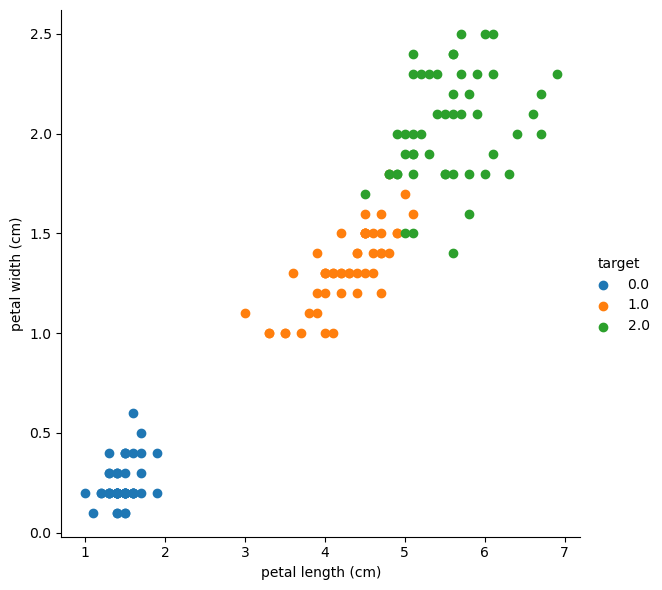

In [4]:
sns.FacetGrid(df, hue='target' , size=6).map(plt.scatter, 'petal length (cm)', 'petal width (cm)').add_legend()

In [5]:
model = DecisionTreeClassifier()
#model = DecisionTreeClassifier(criterion='entropy',max_depth=3)

model.fit(iris.data, iris.target)
print(model)

DecisionTreeClassifier()


In [6]:
model.score(iris.data, iris.target)

1.0

In [7]:
expected = iris.target
predicted = model.predict(iris.data)

In [8]:
print(metrics.classification_report(expected,predicted))
print(metrics.confusion_matrix(expected,predicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        50
           2       1.00      1.00      1.00        50

    accuracy                           1.00       150
   macro avg       1.00      1.00      1.00       150
weighted avg       1.00      1.00      1.00       150

[[50  0  0]
 [ 0 50  0]
 [ 0  0 50]]


In [9]:
   def Decision_Tree(Type,Depth):
        iris=datasets.load_iris()
        X= iris.data[:, :2]
        Y= iris.target
        h= .02
        model = DecisionTreeClassifier(criterion=Type,max_depth=Depth)
        model.fit(X,Y)
        x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
        y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
        xx , yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
        Z= model.predict(np.c_[xx.ravel(), yy.ravel()])
        Z= Z.reshape(xx.shape)
        plt.figure(1, figsize=(4,3))
        plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)
        plt.scatter(X[:,0], X[:, 1], c=Y, edgecolors='k', cmap=plt.cm.Paired)
        plt.xlabel('Sepal length')
        plt.ylabel('Sepal width')
        plt.xlim(xx.min(), xx.max())
        plt.ylim(yy.min(), yy.max())
        plt.xticks(())
        plt.yticks(())
        plt.show()
        model.fit(iris.data, iris.target)
        expected = iris.target
        predicted = model.predict(iris.data)
        print(metrics.classification_report(expected,predicted))
        print(metrics.confusion_matrix(expected,predicted))
        

In [10]:
from IPython.html import widgets
from IPython.html.widgets import interact
from IPython.display import display

C:\Users\Lenovo\anaconda3\lib\site-packages\IPython\html.py:12: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  warn("The `IPython.html` package has been deprecated since IPython 4.0. "


In [11]:
i = interact(Decision_Tree, Type = ['gini', 'entropy'], Depth = (1,10))

interactive(children=(Dropdown(description='Type', options=('gini', 'entropy'), value='gini'), IntSlider(value…

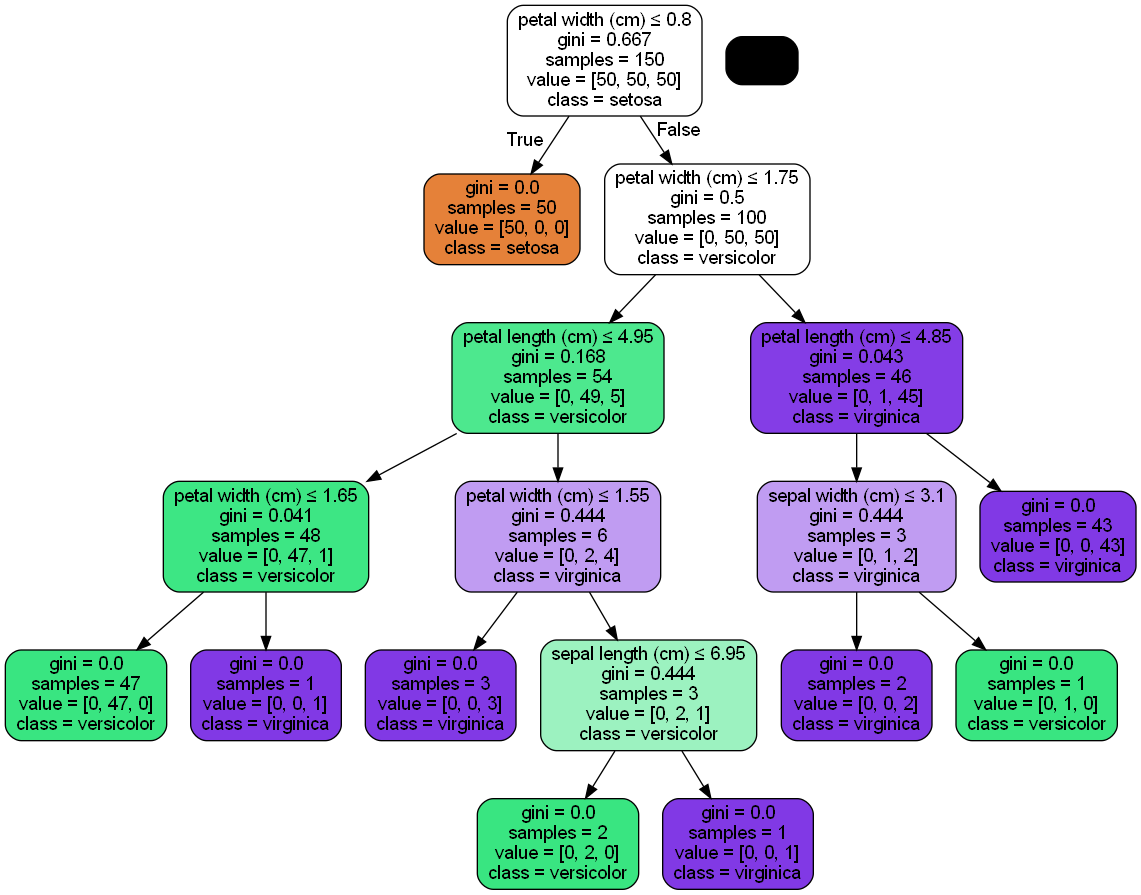

In [13]:
X = iris.data
Y = iris.target
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
import pydotplus
from six import StringIO
from IPython.display import Image
clf = DecisionTreeClassifier()
clf.fit(X, Y)
dot_data = StringIO()
export_graphviz(clf, out_file = dot_data, filled=True, rounded=True, special_characters=True, feature_names=iris.feature_names, class_names= iris.target_names)
graph= pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

### 